In [1]:
import numpy as np
import pandas as pd


In [2]:
# import data
df = pd.read_csv("data/Life Expectancy Data.csv")
# print(dataf)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.iloc[0]

Country                            Afghanistan
Year                                      2015
Status                              Developing
Life expectancy                           65.0
Adult Mortality                          263.0
infant deaths                               62
Alcohol                                   0.01
percentage expenditure               71.279624
Hepatitis B                               65.0
Measles                                   1154
 BMI                                      19.1
under-five deaths                           83
Polio                                      6.0
Total expenditure                         8.16
Diphtheria                                65.0
 HIV/AIDS                                  0.1
GDP                                  584.25921
Population                          33736494.0
 thinness  1-19 years                     17.2
 thinness 5-9 years                       17.3
Income composition of resources          0.479
Schooling    

In [4]:
df.shape

(2938, 22)

In [5]:
# pre cleaning
df = df.dropna()
df.columns = df.columns.str.strip()
# doi ten columns
# dataf.rename(columns={'Life expectancy': 'life_exp','Adult Mortality': 'adul_mor','infant deaths':'infa_dea'  })
# slice data
columnStr = [columnName for (columnName, values) in df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64'].items()]
columnStr.append('Year')
print(columnStr)
# data type no number
dfStr = pd.DataFrame()
dfNum = df.copy(deep = False)
for (columnName, values) in df.items():
    if columnName in columnStr:
        dfStr[columnName] = values
        dfNum = dfNum.drop(columnName, axis=1)





['Country', 'Status', 'Year']


In [6]:
# b1: cleaning data
df.isnull().sum()

# replace NaNs in all column with average of this column
for (columnName, columnValues) in dfNum.items():
    df[columnName] =  df[columnName].fillna( df[columnName].mean() )
# print(dataf.isnull().sum())
# Removing Duplicate Row
# dataf.duplicated(keep=False)
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)
# số hàng ko đổi => ko có hàng nào bị lặp
# chuẩn hóa các cột có giá trị string
for (columnName, values) in dfStr.items():
    dfStr[columnName] = dfStr[columnName].astype('string')
# chuẩn hóa các cột có giá trị số
# num = dfNum.values.astype(float)
# min_max_scaler = preprocessing.MinMaxScaler() 
# x_scaled = min_max_scaler.fit_transform(num) 
# dfNum = pd.DataFrame(x_scaled, columns=dfNum.columns) 

# print(dfNum)
# loại bỏ ngoại lệ: chưa cần đến

# hợp nhất data:
# for(col, vals) in dfStr.items():
#     df[col] = vals
# for(col, vals) in dfNum.items():
#     df[col] = vals
# ko can hop nhat data vi chi co dataFrame dfNum co gia tri tinh toan
df = dfNum.copy()
print(df.shape)

(1649, 22)
(1649, 19)


In [7]:
# Examining the Correlation Between the Feature
corr = df.corr()
print(corr.head(2))
corr.info()
corr.shape

                 Life expectancy  Adult Mortality  infant deaths   Alcohol  \
Life expectancy         1.000000        -0.702523      -0.169074  0.402718   
Adult Mortality        -0.702523         1.000000       0.042450 -0.175535   

                 percentage expenditure  Hepatitis B   Measles       BMI  \
Life expectancy                0.409631     0.199935 -0.068881  0.542042   
Adult Mortality               -0.237610    -0.105225 -0.003967 -0.351542   

                 under-five deaths     Polio  Total expenditure  Diphtheria  \
Life expectancy          -0.192265  0.327294           0.174718    0.341331   
Adult Mortality           0.060365 -0.199853          -0.085227   -0.191429   

                 HIV/AIDS       GDP  Population  thinness  1-19 years  \
Life expectancy -0.592236  0.441322   -0.022305             -0.457838   
Adult Mortality  0.550691 -0.255035   -0.015012              0.272230   

                 thinness 5-9 years  Income composition of resources  \
Life e

(19, 19)

C:\Users\THAIHB.B19CN638\AppData\Local\Temp\ipykernel_3672\678486132.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(corr.columns)


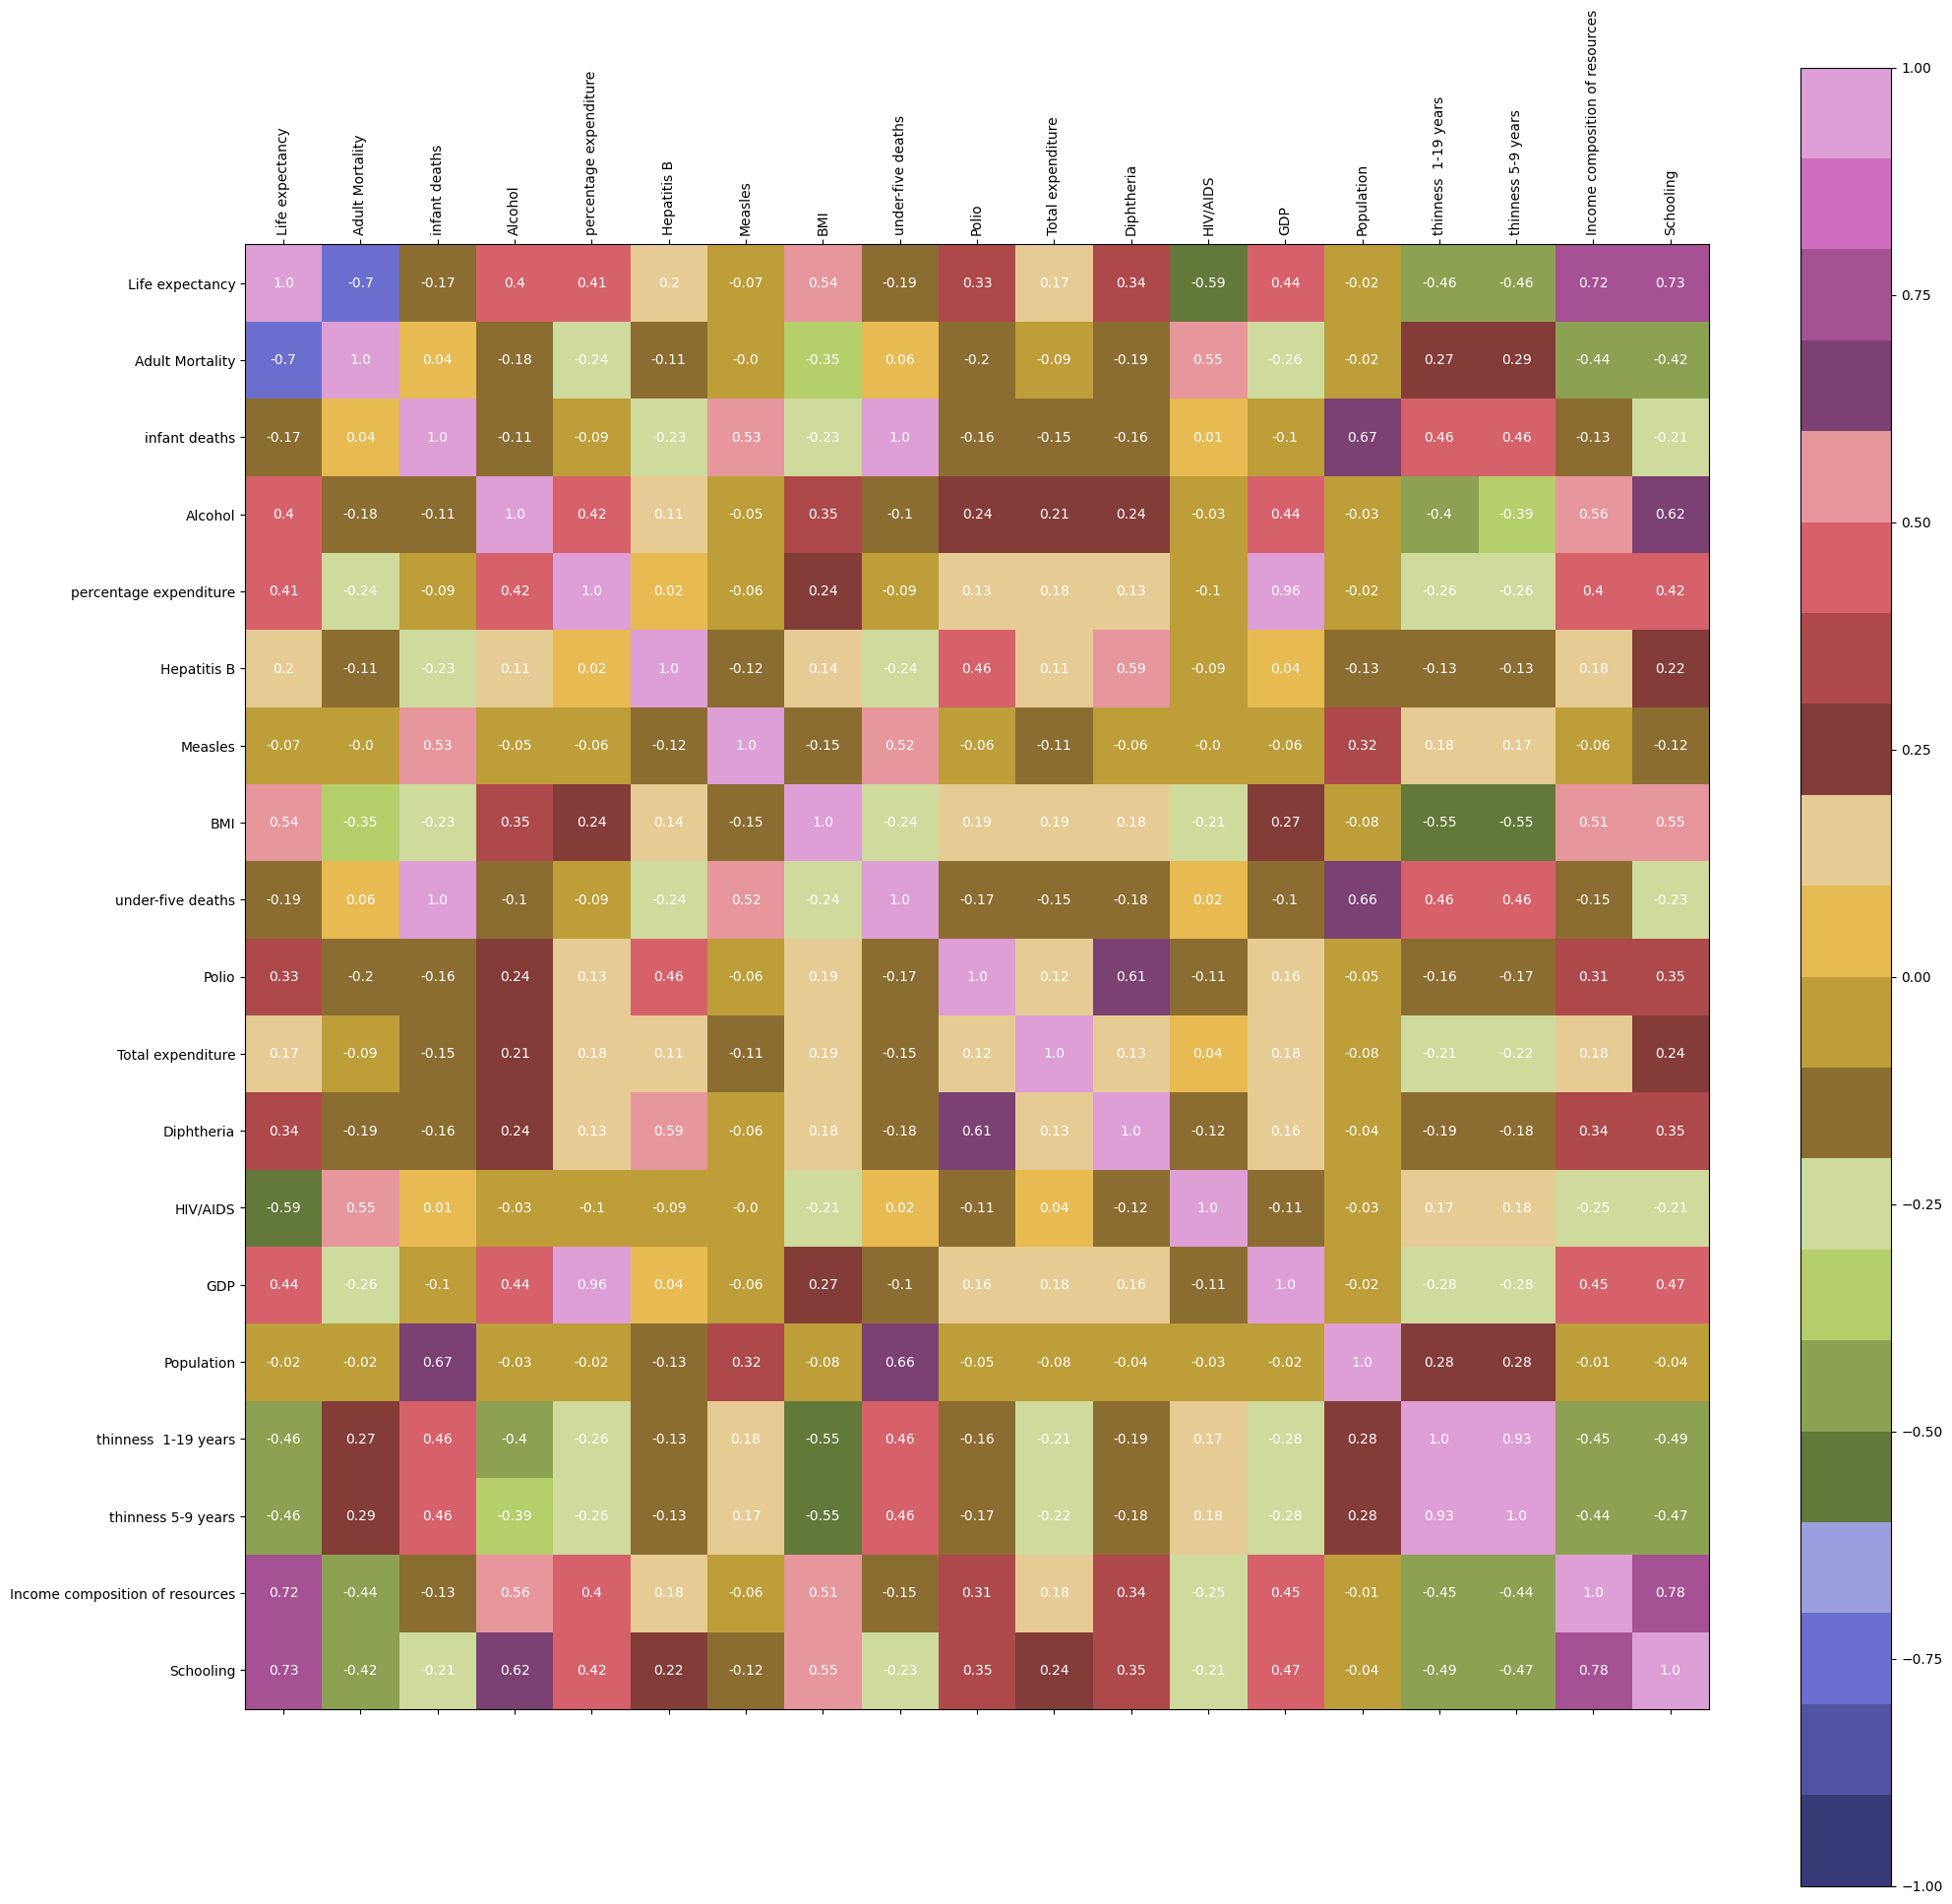

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24, 24))
cax = ax.matshow(corr,cmap='tab20b', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns)

plt.xticks(rotation = 90)

ax.set_yticklabels(corr.columns)
ax.set_yticks(ticks)
#---print the correlation factor---
for i in range(corr.shape[1]):
    for j in range(corr.shape[1]):
        text = ax.text(j, i, round(corr.iloc[i][j],2),
         ha="center", va="center", color="white")
plt.show()

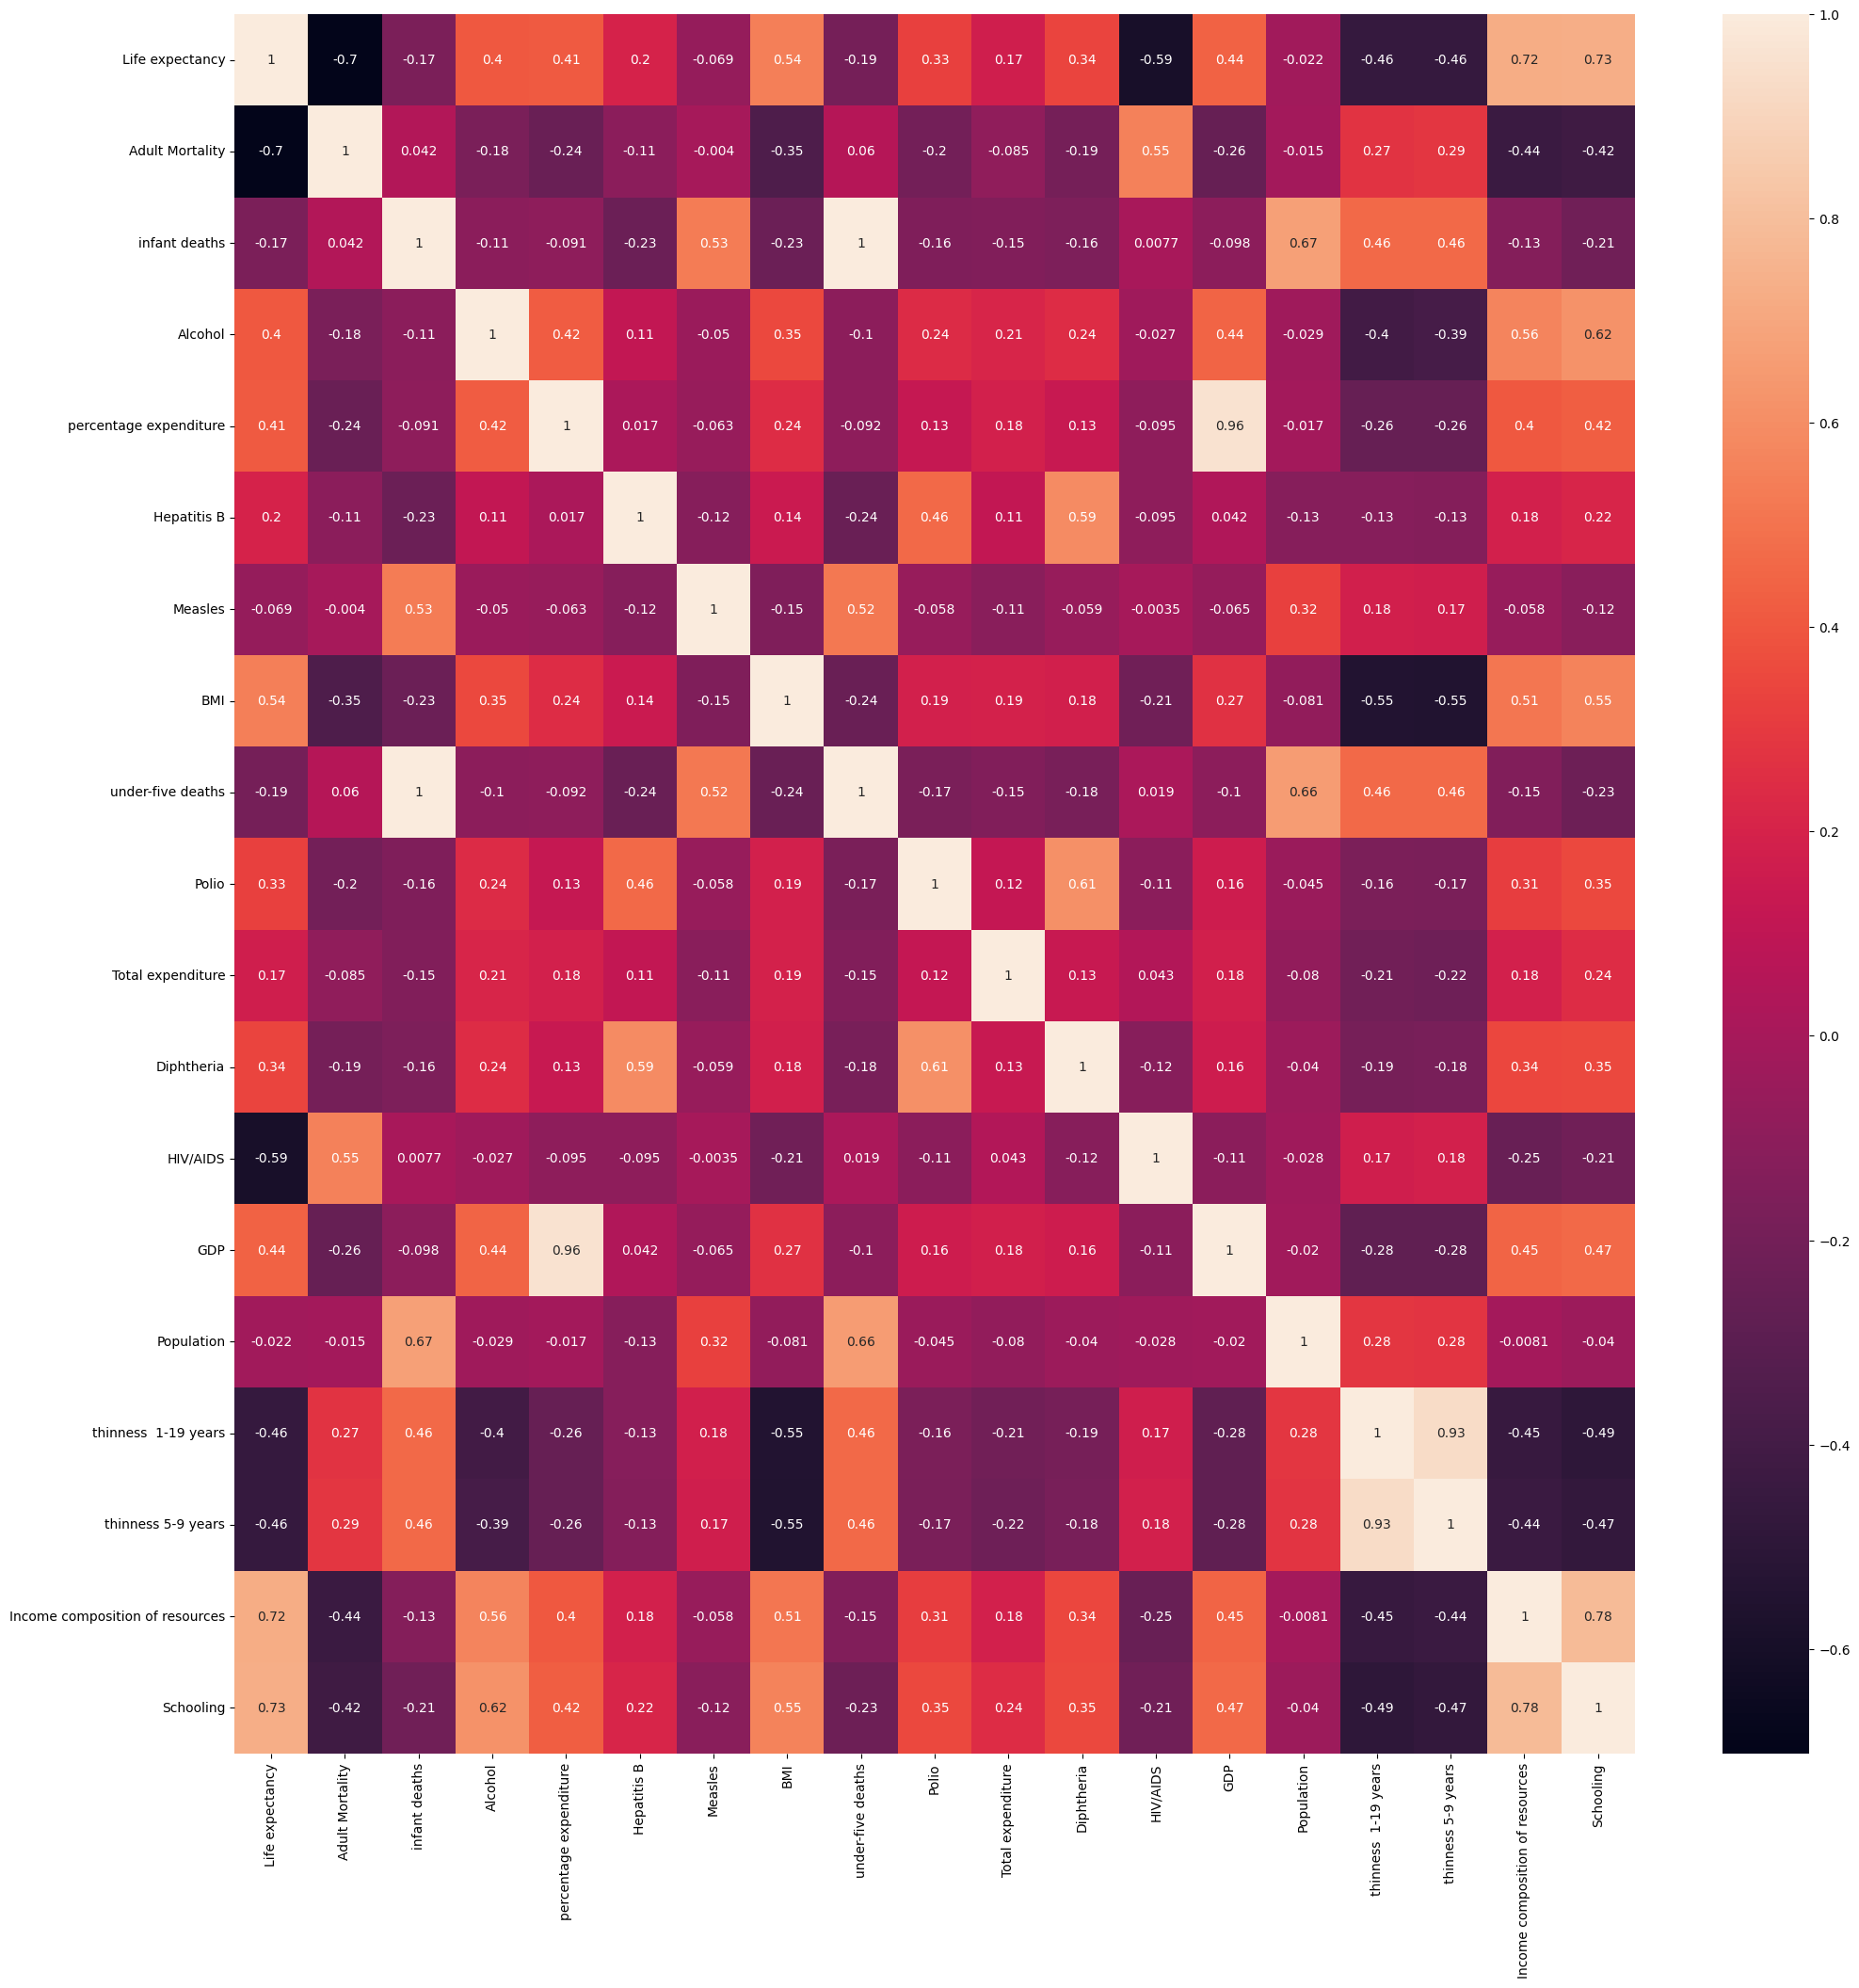

In [9]:
# plot by seaborn 
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(24,24)

In [10]:
#---get the top four features that has the highest correlation---
print(df.corr().nlargest(4, 'Life expectancy').index)
#---print the top 4 correlation values---
print(df.corr().nlargest(4, 'Life expectancy').values[:,0])

Index(['Life expectancy', 'Schooling', 'Income composition of resources',
       'BMI'],
      dtype='object')
[1.         0.72763003 0.72108259 0.54204159]


In [11]:
df = df.rename(columns={'Life expectancy': 'LE','Income composition of resources': 'ICR'  })
df.columns

Index(['LE', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'ICR', 'Schooling'],
      dtype='object')

In [12]:
# LUA CHON TINH NANG
result = []

# OPTION 1 Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
#---features---
X = df[['Schooling','ICR','BMI']]
#---label---
y = df.iloc[:,1]
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10, scoring='accuracy').mean()
print(log_regress_score)
result.append(log_regress_score)

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

0.009094604582409462


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\

The optimal number of neighbors is 27
0.018791574279379157


In [49]:
# Support Vector Machines
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
 cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.08065779748706578


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.06732076866223206


In [16]:
print(result)

[0.07822985957132297, 0.08975360400117682, 0.08065779748706578, 0.06732076866223206]


In [17]:
# hoan thanh chon thuat toan toi uu
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.089754
SVM Linear Kernel,0.080658
Logistic Regression,0.078230
SVM RBF Kernel,0.067321


In [28]:
# DAO TAO VA LUU MODULE
knn = KNeighborsClassifier(n_neighbors=579)
knn.fit(X, y)

import pickle 
# luu model vao o dia 
filename = 'Life_expectancy_train.sav'

# viet vao file su dung che do nhi phan
pickle.dump(knn, open(filename, 'wb'))

# load model tu o dia 
loaded_model = pickle.load(open(filename, 'rb'))
Schooling = 10.1
ICR = 0.479
BMI = 19.1

prediction = loaded_model.predict([[Schooling, ICR, BMI]])
print("prediction LE: ", prediction)

proba = loaded_model.predict_proba([[Schooling, ICR, BMI]])
print("proba: ", proba)
print("Confidence: "+ str(round(np.amax(proba[0]) * 100, 2)) + "%")


prediction LE:  [98.]
proba:  [[0.00345423 0.00345423 0.00345423 0.00690846 0.01554404 0.02417962
  0.02763385 0.00172712 0.         0.00172712 0.00172712 0.00345423
  0.00172712 0.         0.00172712 0.00172712 0.00172712 0.00172712
  0.         0.00345423 0.00172712 0.00345423 0.00172712 0.00172712
  0.00172712 0.         0.00345423 0.00172712 0.00690846 0.00345423
  0.00690846 0.00172712 0.00345423 0.00345423 0.00518135 0.00690846
  0.00172712 0.00345423 0.00345423 0.00518135 0.         0.00172712
  0.         0.00172712 0.00345423 0.00345423 0.         0.00345423
  0.01381693 0.01381693 0.02590674 0.01381693 0.01036269 0.00863558
  0.01036269 0.00863558 0.00690846 0.01381693 0.02072539 0.01554404
  0.02763385 0.01554404 0.01727116 0.01554404 0.01727116 0.01036269
  0.02763385 0.02417962 0.0224525  0.01036269 0.01554404 0.0224525
  0.03108808 0.03108808 0.03108808 0.03626943 0.03454231 0.03108808
  0.03454231 0.05008636 0.03972366 0.05699482 0.04835924]]
Confidence: 5.7%


C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\THAIHB.B19CN638\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
